# Power Demand clustering using _kShape_

<div style="width: 130px ; float: right"><img src="https://bit.ly/2FFGepI" alt="drawing"><p style="font-size: 10px ; text-align: center; margin: 0px 0px">Illustration by Aitor Picón</p></div>

Data sequence clustering algorithms groups series based on their shapes. An important feature regarding clustering algorithms is their ability to deal with subtle changes in shapes; in some cases, being able to identify small shape variations in a set is key to correctly produce the most appropriate clusters for our data.

In this example, we use [Khiva's](https://khiva-python.readthedocs.io/en/latest/) implementation of [_kShape_](http://www.cs.columbia.edu/~gravano/Papers/2017/tods17.pdf) to classify monthly electrical power demand time series from Italy._kShape_ outperforms other algorithms like _kMeans_, as it obtains better results due to the lack of dependence on scale and shifting. In this use-case, we run both algorithms and compare their results.

We have chosen a [Power Demand Dataset from Italy]( http://www.timeseriesclassification.com/description.php?Dataset=ItalyPowerDemand) which contains the power consumption monitored by a power meter during 67 days. For each one of those days, it records the average power consumption by hour, so each sampled day contains 24 measures. The classification task is to distinguish days belonging to the period between October and March (inclusive), and to the period between April and September. 

The objective of this use case is to compare the accuracy of Khiva's _kShape_ implementation and _kMeans_ while clustering sequences.


In [42]:
import khiva as kv
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from ipywidgets import interact, IntSlider

def accuracy(output, test_classes):
    equals = float(np.sum(output == test_classes))
    accuracy = max(equals/len(output), 1-(equals/len(output)))
    print("Accuracy: " + str(accuracy))

## Visualising the dataset
Firstly, let's load the training dataset and plot all samples in a single chart.

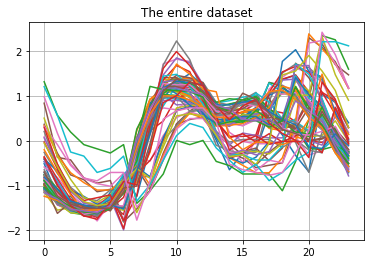

In [43]:
data = pd.read_csv("ItalyPowerDemand_TRAIN.txt", header=None, sep=' ')

data = data.values
classes = data[:,0]
data = np.delete(data, 0, 1)

plt.plot(data.transpose())
plt.grid(True)
plt.title("The entire dataset")
plt.show()

 As we can see, it is hardly impossible to perform an accurate classification by visual inspection, as there are no key differences between the different kind of meat.

## Clustering using _kShape_
Let's run _kShape_ algorithm first. _Khiva_ implementation will compute the centroids for each group automatically. These centroids keep the key characteristics for each group, like shift, scale and shape, thanks to a specialised data series distance metric called SBD (in reality, it is a dissimilarty distance), which takes into account the actual shape of the series.



In [44]:
k=2
titles = ["First cluster", "Second cluster", "Third cluster", "Forth cluster", "Fifth cluster"]

def k_shape_variation(k, num_iter):
    (centroids, labels) = kv.k_shape(kv.Array(data), k, max_iterations=num_iter)

    cen = centroids.to_numpy()
    lab = labels.to_numpy()
    
    print("kShape Statistics\n")
    accuracy((lab-1)%2, (classes-1)%2)
    
    for i in range(k):
        cond = lab == i
        if np.any(cond):
            plt.plot(data[lab == i, :].transpose())
            plt.plot(cen[i, :], label="centroid", c='k')
            plt.title(titles[i])
            plt.grid(True)
            plt.show()    

interact(k_shape_variation, k=IntSlider(min=2, max=5, step=1), num_iter=IntSlider(min=1, max=10, step=1), 
         continuous_update=True)

interactive(children=(IntSlider(value=2, description='k', max=5, min=2), IntSlider(value=1, description='num_i…

<function __main__.k_shape_variation(k, num_iter)>

Move the slider button to change the number of iterations and check how this impact on k-shapes accuracy! You can also analyse the statistics corresponding to this classification with a summary of results.

## Clustering using _kMeans_

Now we are going to we are going to execute the same analysis but using _Scikit's_ _kMeans_ implementation, so we can benchmark its accuracy against _KShape_.

In [45]:
def kMeans_variation(k, n_max_iter):
    titles = ["First cluster", "Second cluster", "Third cluster", "Forth cluster", "Fifth cluster"]

    km = KMeans(n_clusters=k, max_iter = n_max_iter).fit(data)
    
    accuracy((km.labels_)%2, (classes)%2)
    
    for i in range(k):
        cond = km.labels_ == i
        if np.any(cond):
            plt.plot(data[km.labels_ == i, :].transpose())
            plt.plot(km.cluster_centers_[i, :], label="centroide", c='k')
            plt.title(titles[i])
            plt.grid(True)
            plt.show()
        
interact(kMeans_variation, k=IntSlider(min=2, max=5, step=1), n_max_iter=IntSlider(min=1, max=10, step=1), 
         continuous_update=True)

interactive(children=(IntSlider(value=2, description='k', max=5, min=2), IntSlider(value=1, description='n_max…

<function __main__.kMeans_variation(k, n_max_iter)>

Considering the previous results, it becomes apparent that using a specialised algorithm for data series delivers better clustering insights, rather than those obtain using a more generalized algorithm like _kMeans_.

Give a try to Khiva's _kShape_ implementation on your dataset. Share with us the results obtained and make a pull request to publish them!.